In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
motor=pd.read_csv("pmsm_temperature_data.csv.csv")

In [0]:
motor.describe()

,Unnamed: 0,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000
mean,499093.869157,-0.003129,0.004779,0.004275,-0.005819,-0.006024,-0.002985,0.005794,-0.002809,-0.004385,0.000623,-0.002212,-0.003988,50.737721
std,288133.057977,0.992710,1.002086,0.997729,1.002404,1.001700,0.997403,0.999005,0.997375,0.995450,1.001119,0.999732,0.998443,22.072923
min,1.000000,-7.968341,-1.367800,-1.654878,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,249410.000000,-0.598182,-1.037856,-0.827631,-0.927994,-0.951892,-0.266604,-0.756753,-0.257268,-0.671621,-0.747074,-0.761951,-0.725651,32.000000
50%,498978.000000,0.266325,-0.176651,0.267501,-0.099512,-0.140246,-0.187167,0.213188,-0.188490,0.094138,-0.057264,0.005240,0.006893,56.000000
75%,748685.000000,0.686697,0.648482,0.358460,0.852677,0.855411,0.547458,1.013975,0.499623,0.680431,0.697432,0.772349,0.725208,68.000000
max,998070.000000,2.967117,2.649032,2.274734,1.793498,2.024151,3.016895,1.060937,2.914185,2.917456,2.449158,2.326668,2.651810,81.000000


In [0]:
X_motor=motor.iloc[:,[1,2,3,4,5,6,7,8,10,11,12,13]]
y_motor=motor.iloc[:,[9]]

In [0]:
X_motor.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id'],
      dtype='object')

In [0]:
y_motor

,pm
0,-2.522071
1,-2.522673
2,-2.521639
3,-2.521900
4,-2.522203
5,-2.522844
6,-2.522677
7,-2.522214
8,-2.521926
9,-2.522311


## EDA 

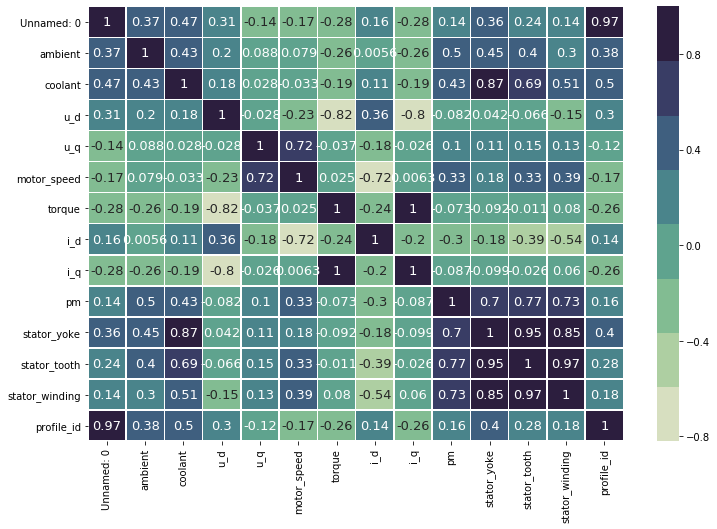

In [0]:
# checking the correlation (Pearson's coeff)
corr_matrix = motor.corr()
f,ax  = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,linewidths=.5,annot_kws={"size": 13}, ax=ax, cmap = sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.show()

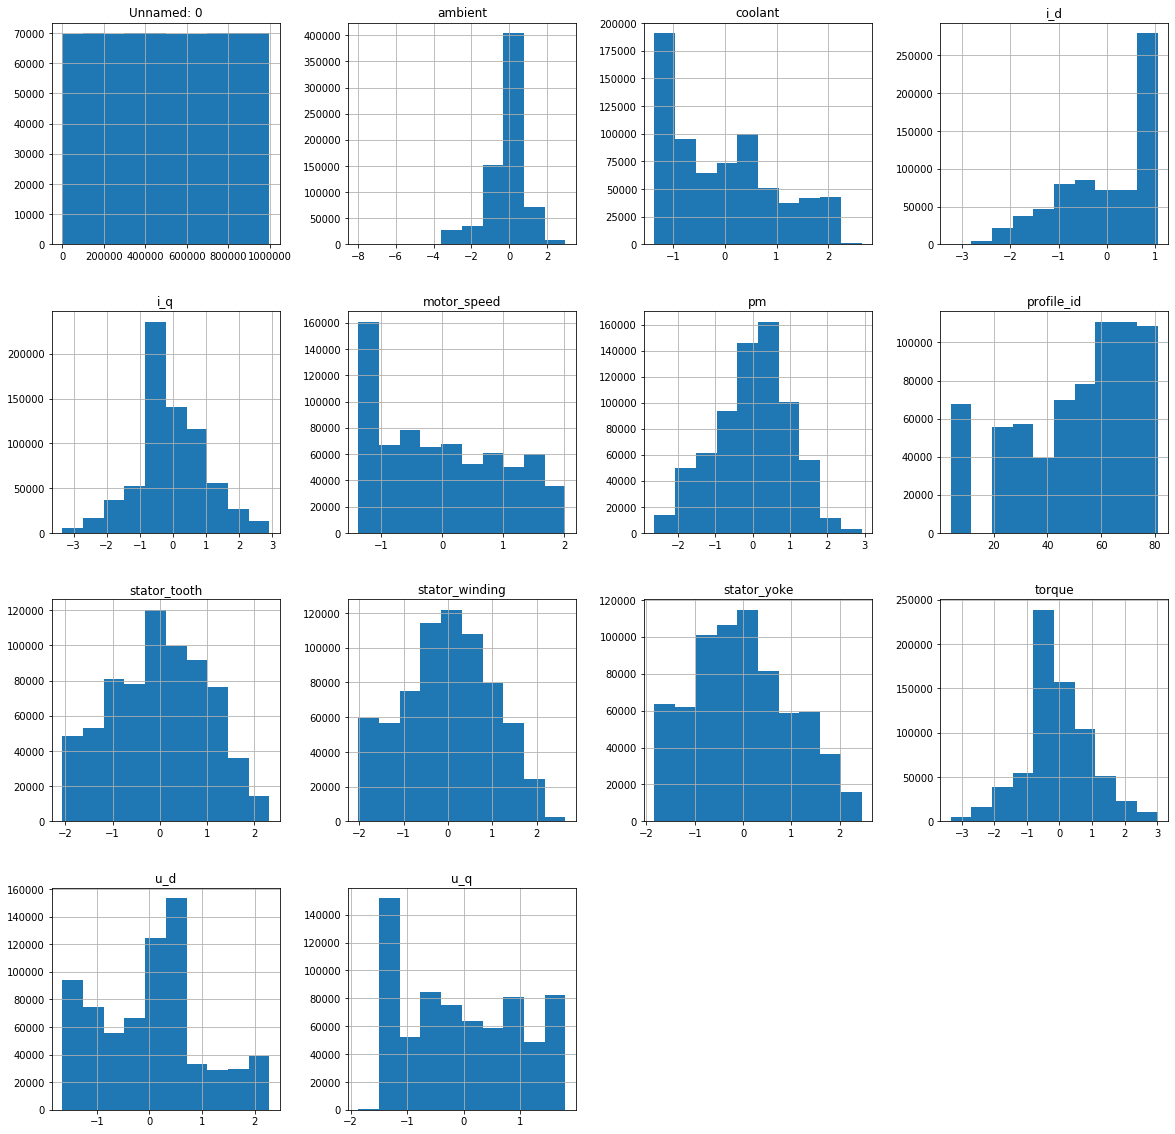

In [0]:
motor.hist(figsize = (20,20))
plt.show()
#HISTOGRAM to check the data  is normally distributed  

In [0]:
# linear correlation for "pm" target

cpm = corr_matrix["pm"].sort_values(ascending=False)
print("correlation for ")
cpm[cpm >= 0.5] # 0.5 for medium or high linear correlation

correlation for 


pm                1.000000
stator_tooth      0.768570
stator_winding    0.729916
stator_yoke       0.695267
ambient           0.501772
Name: pm, dtype: float64

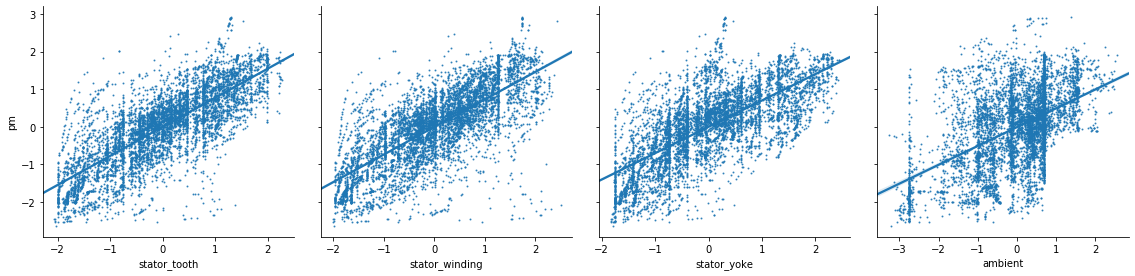

In [0]:
g = sns.PairGrid(motor.sample(frac=0.01), y_vars=["pm"],
                 x_vars=["stator_tooth", "stator_winding", "stator_yoke", "ambient"], height=4, palette="GnBu_d")

g.map(sns.regplot, scatter_kws={'s':1});

In [0]:
column = ["stator_tooth", "stator_winding", "stator_yoke", "ambient"]

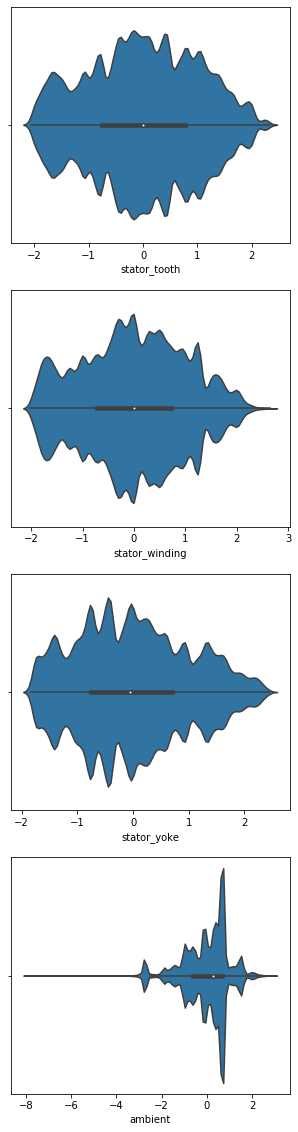

In [0]:
fig, axes = plt.subplots(nrows=4, figsize=(5,20))
fig.subplots_adjust(hspace=0.2)

for (ax, i) in zip(axes, column):
    sns.violinplot(x=motor[i], ax=ax)
    plt.plot()

## Feature Selection with RFE

In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=10,random_state=0)

In [0]:
rfe = RFE(estimator=etr, n_features_to_select=6, step=1)
rfe.fit(X_motor,y_motor)

C:\Users\sedulous\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                  criterion='mse', max_depth=None,
                                  max_features='auto', max_leaf_nodes=None,
                                  max_samples=None, min_impurity_decrease=0.0,
                                  min_impurity_split=None, min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=10,
                                  n_jobs=None, oob_score=False, random_state=0,
                                  verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold
# from sklearn.feature_selection import RFECV

In [0]:
# etr=ExtraTreesRegressor(n_estimators=100,random_state=42)
# rfecv = RFECV(estimator=etr, step=1, cv=KFold(10))
# rfecv.fit(X_motor,y_motor)

In [0]:
# plt.figure(figsize=(16, 9))
# plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
# plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
# plt.ylabel('% Correct Regressor', fontsize=14, labelpad=20)
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

# plt.show()

In [0]:
ranking = rfe.ranking_

In [0]:
ranking

array([1, 2, 7, 4, 1, 3, 5, 6, 1, 1, 1, 1])

In [0]:
X_motor.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id'],
      dtype='object')

In [0]:
motor_new=motor.filter(["stator_tooth", "stator_winding", "stator_yoke", "ambient",'profile_id',"pm"])

In [0]:
motor_new.columns

Index(['stator_tooth', 'stator_winding', 'stator_yoke', 'ambient',
       'profile_id', 'pm'],
      dtype='object')

In [0]:
X=motor_new.iloc[:,0:5]
y=motor_new.loc[:,'pm']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [0]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [0]:
xg_re = XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.8, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [0]:
dt_re = DecisionTreeRegressor(random_state=42)

In [0]:

rf_re = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion= 'mse',oob_score= False,random_state=42)

In [0]:
# ridge = Ridge(random_state=42)
# lasso = Lasso(random_state=42)

In [0]:
from sklearn.feature_selection import RFE

In [0]:
from mlxtend.regressor import StackingRegressor

In [0]:
stregr = StackingRegressor(regressors=[dt_re, rf_re,xg_re],meta_regressor=rf_re)

In [0]:
selector = RFE(stregr, 6, step=1)

In [0]:
selector.fit(X_train,y_train)

[16:48:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RFE(estimator=StackingRegressor(meta_regressor=RandomForestRegressor(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                        

In [0]:
new_pred=selector.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error


In [0]:
mean_squared_error(y_test, new_pred)

0.004544706131888652

In [0]:
motor_new=test.filter(["stator_tooth", "stator_winding", "stator_yoke", "ambient",'profile_id'])

In [0]:
test_pred=selector.predict(motor_new)

In [0]:
type(test_pred)

numpy.ndarray

In [0]:
predict=pd.Series(test_pred)

In [0]:
type(test.profile_id)

pandas.core.series.Series

In [0]:
#Save Prediciton
sub = pd.DataFrame(zip([x for x in range(1, len(test_pred)+1)], test_pred), columns=['ID', 'prediction1'])
print(sub.shape)
sub.to_csv('submission.csv', index=False)

(299421, 2)


In [0]:
#submission =pd.concat([motor_test.profile_id,prediction1],axis=1)

In [0]:
#submission

,profile_id,0
0,4,-2.522498
1,4,-2.522498
2,4,-2.522498
3,4,-2.522498
4,4,-2.522498
5,4,-2.522000
6,4,-2.522000
7,4,-2.522295
8,4,-2.522295
9,4,-2.523801


In [0]:
submission.tail

In [0]:
#from sklearn.ensemble import RandomForestRegressor

In [0]:
# from sklearn.model_selection import RandomizedSearchCV

In [0]:
# rf = RandomForestRegressor()

In [0]:
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [0]:
# rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total= 2.7min
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total= 2.7min
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total= 2.7min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total= 7.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total= 7.7min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total= 7.6min
[CV] n_estimators=200, min_samples_split=15, m

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=15.6min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


In [0]:
rmse = np.sqrt(mean_squared_error(y_test, xb))

In [0]:
rmse

0.7286845384049326